In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

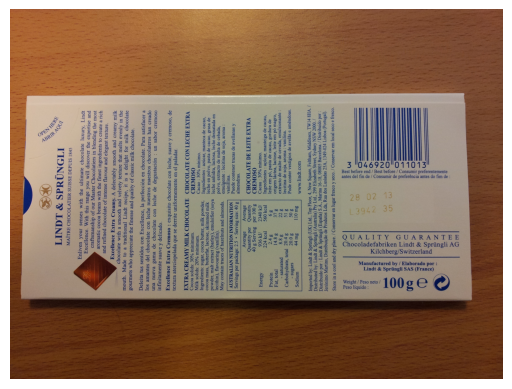

In [55]:
img = cv2.imread("chocolate_original.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

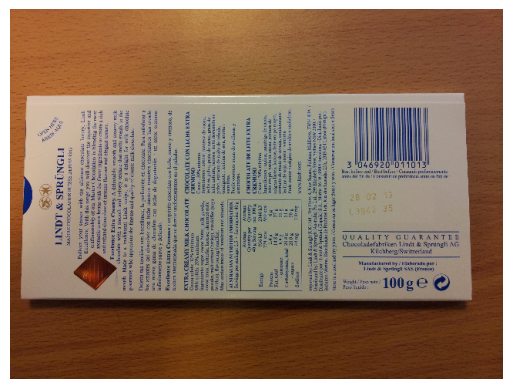

In [56]:
img_resized = cv2.resize(img, (640, 480))
plt.imshow(img_resized)
plt.axis("off")
plt.show()

In [57]:
cv2.imwrite(
    'chocolate_640x480.jpg',
    cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
)

True

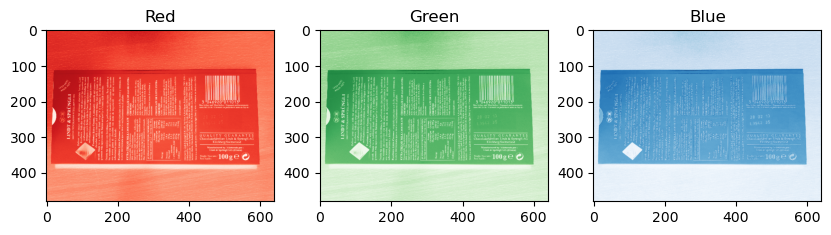

In [58]:
R = img_resized[:, :, 0]
G = img_resized[:, :, 1]
B = img_resized[:, :, 2]
plt.figure(figsize=(10,3))

plt.subplot(1, 3, 1)
plt.imshow(R, cmap="Reds")
plt.title("Red")

plt.subplot(1, 3, 2)
plt.imshow(G, cmap="Greens")
plt.title("Green")

plt.subplot(1, 3, 3)
plt.imshow(B, cmap="Blues")
plt.title("Blue")
plt.show()


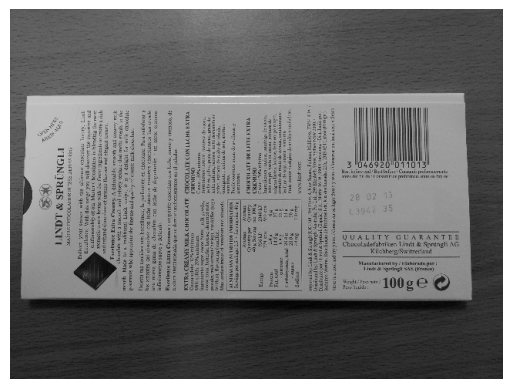

In [59]:
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

Automatic threshold: 104.0


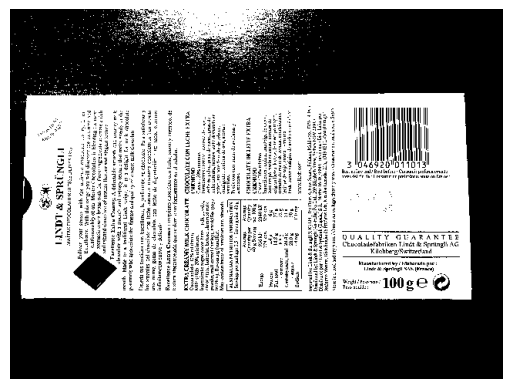

In [60]:
threshold_value, binary_img = cv2.threshold(
    gray,
    0,
    255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
print(f"Automatic threshold: {threshold_value}")

plt.imshow(binary_img, cmap="gray")
plt.axis("off")
plt.show()

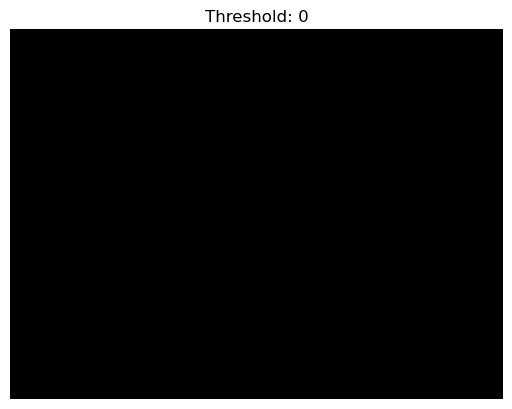

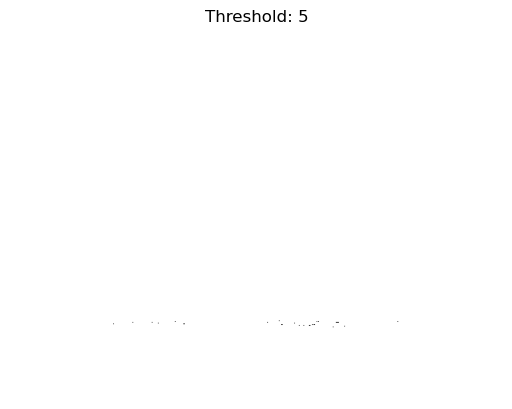

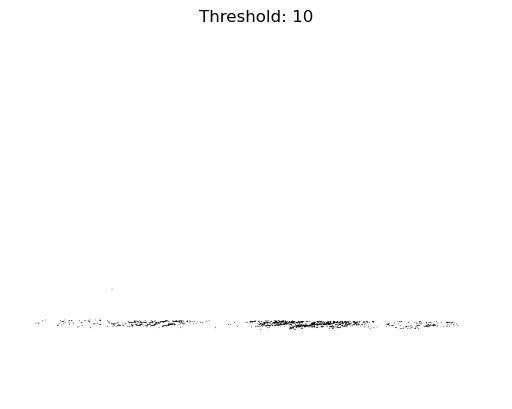

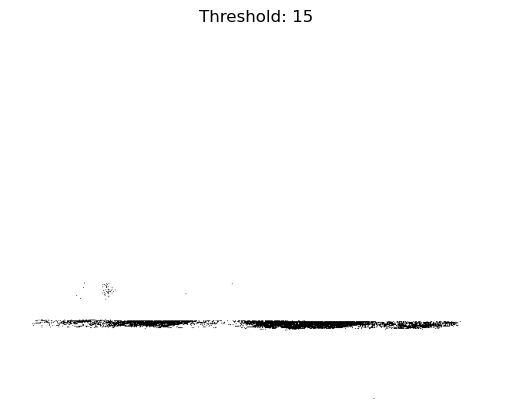

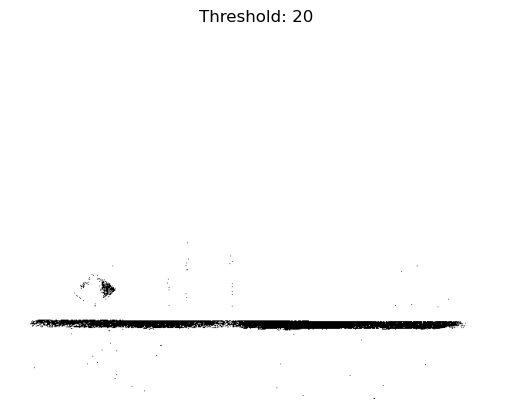

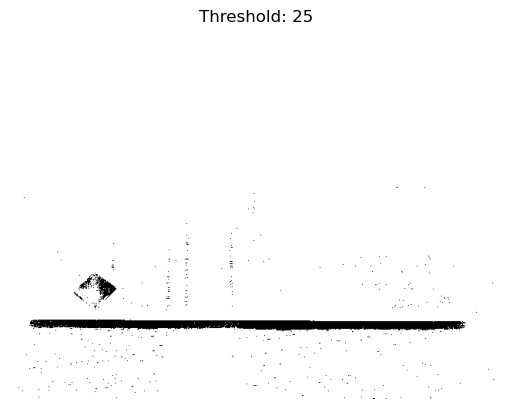

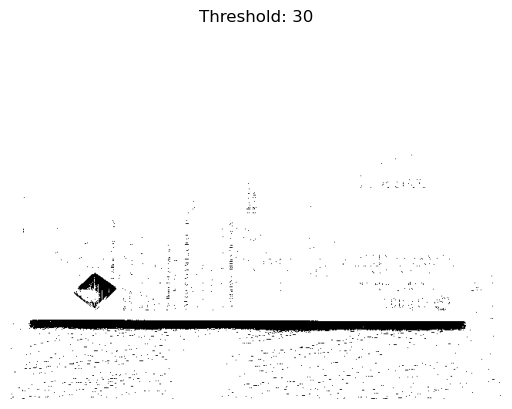

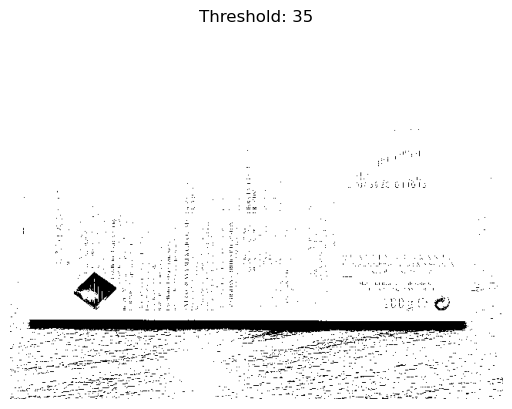

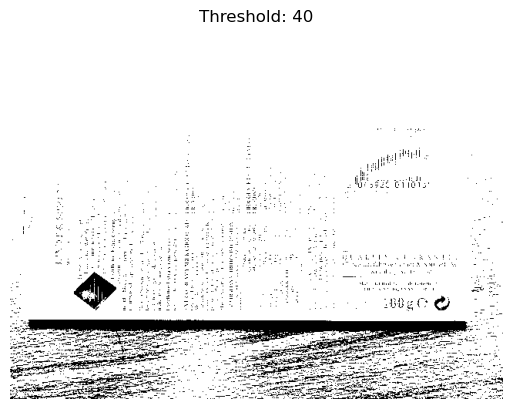

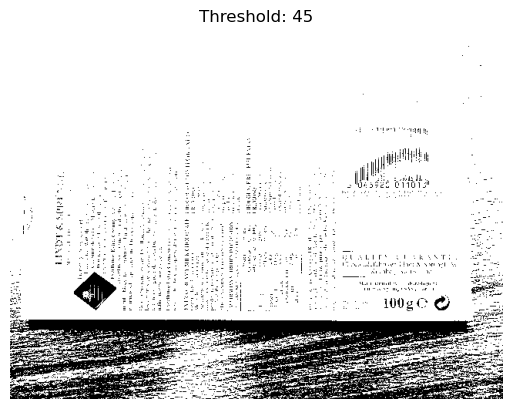

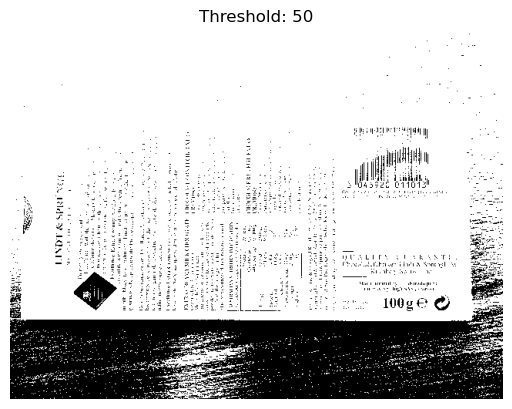

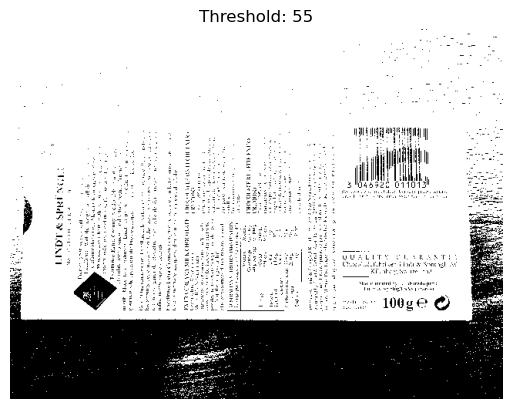

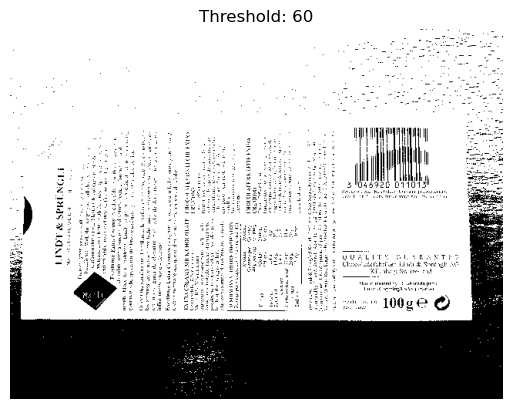

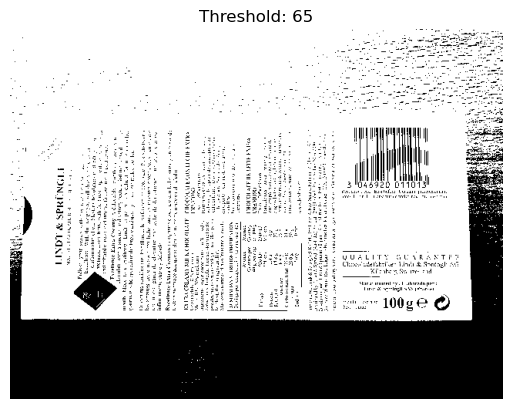

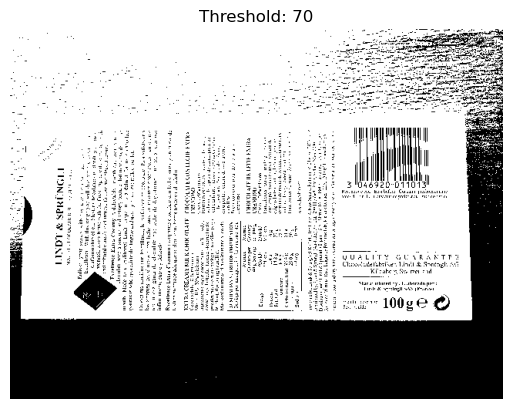

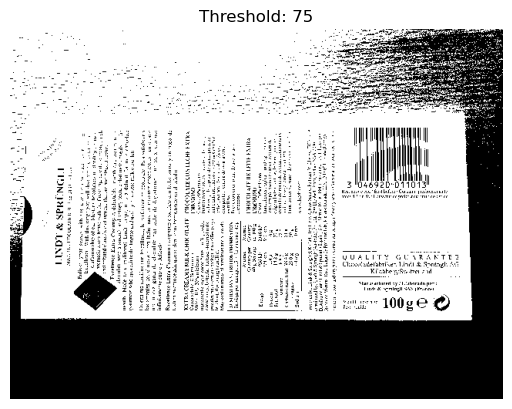

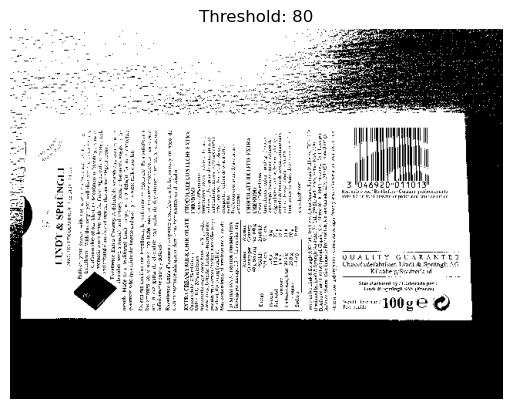

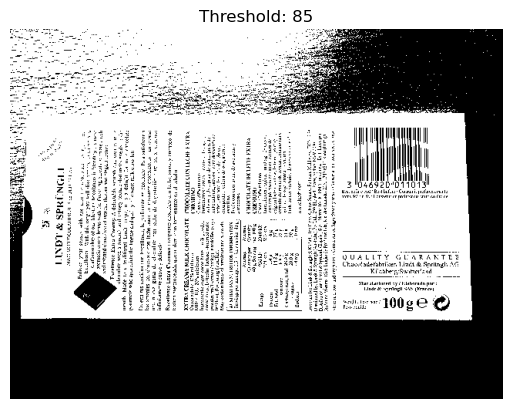

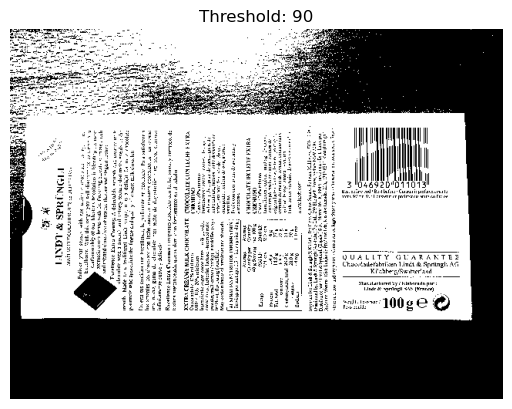

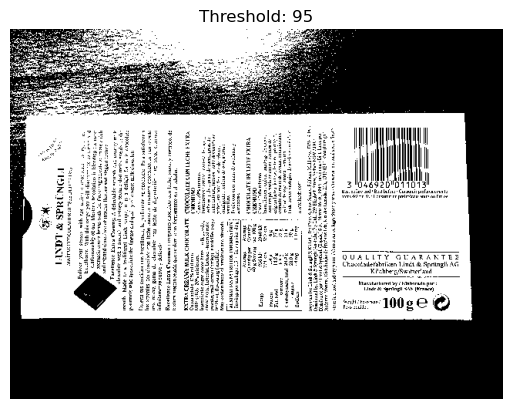

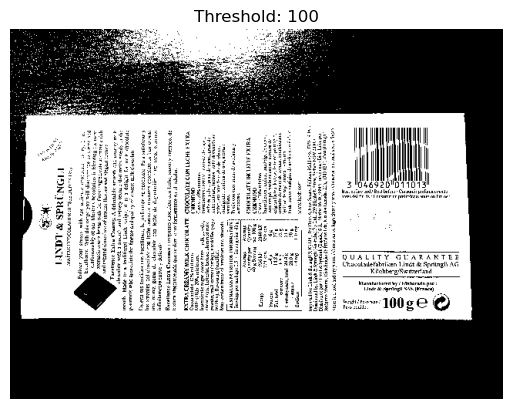

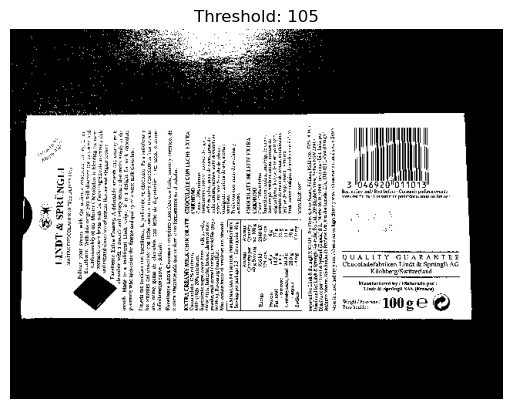

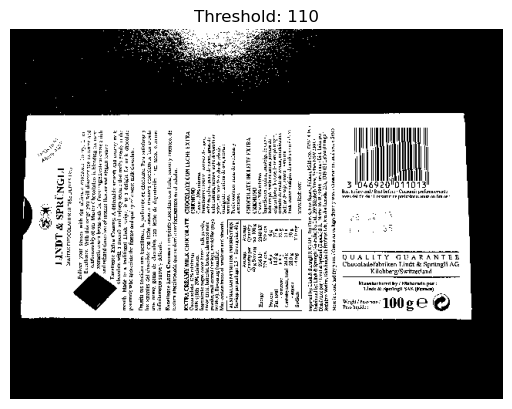

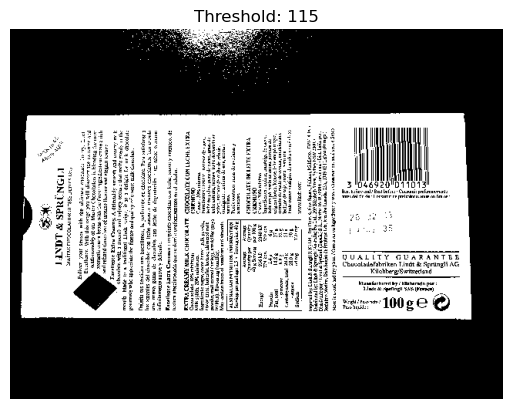

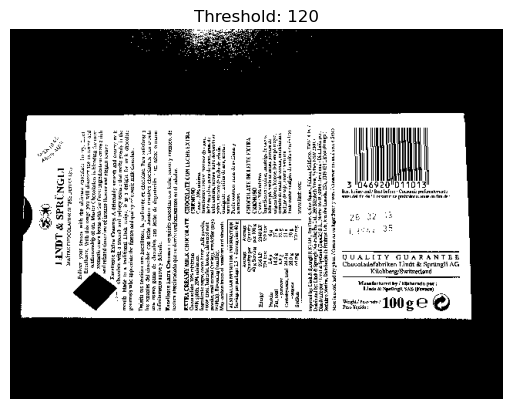

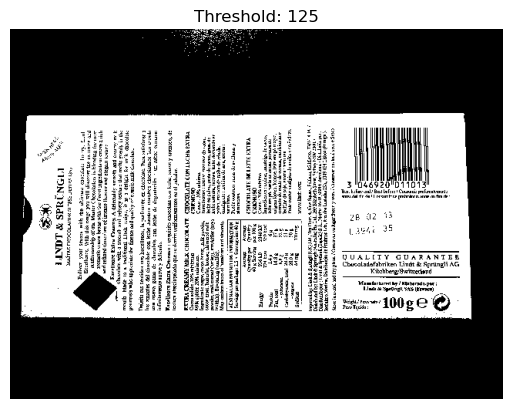

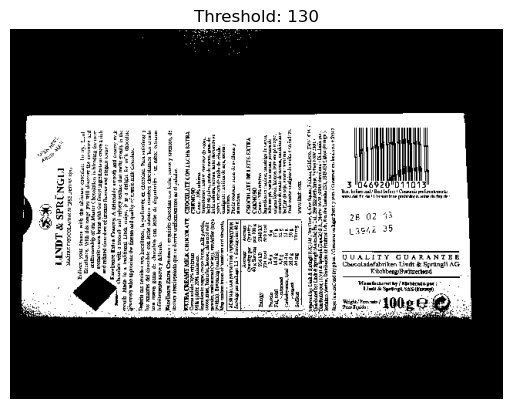

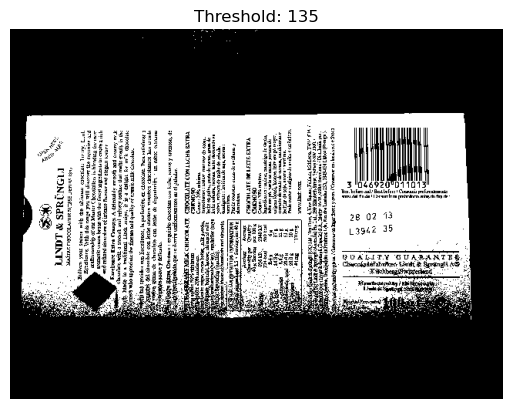

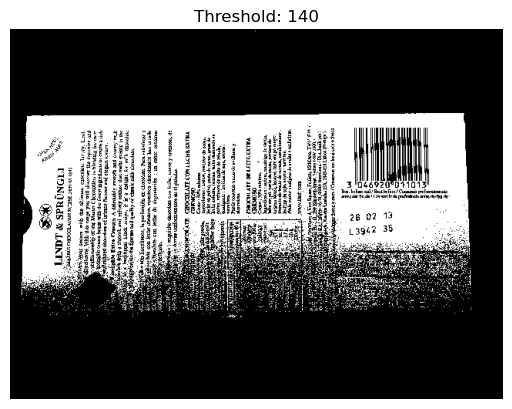

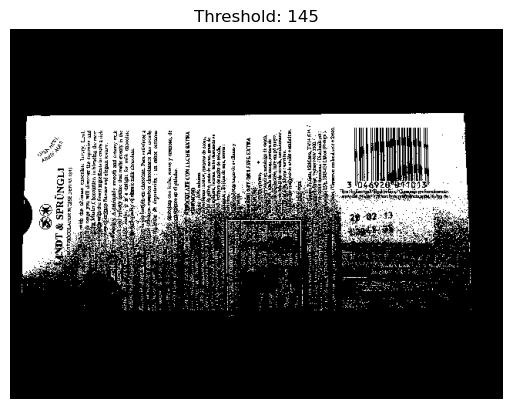

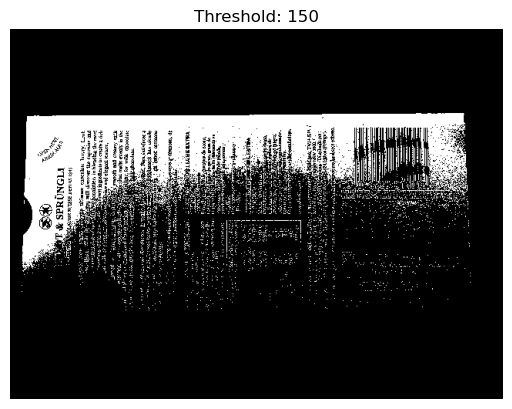

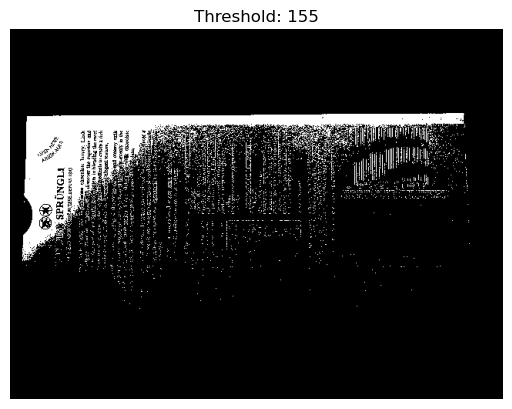

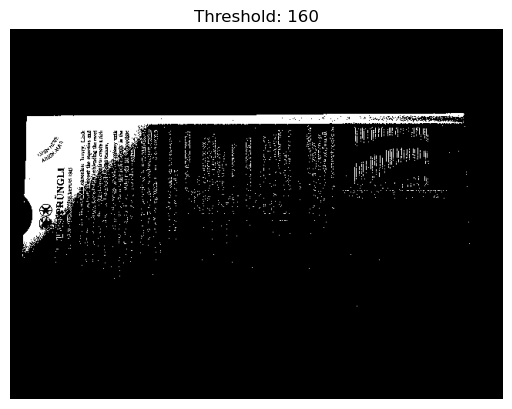

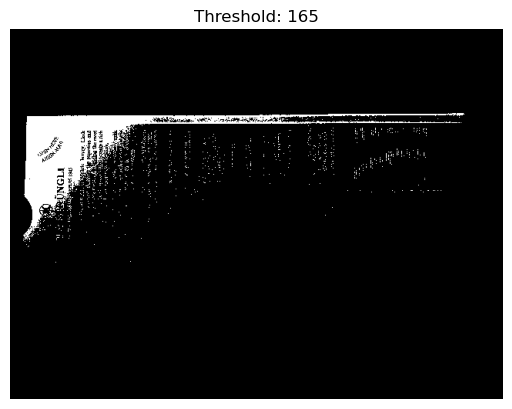

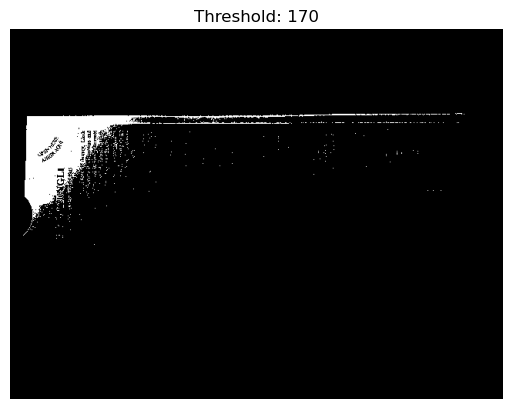

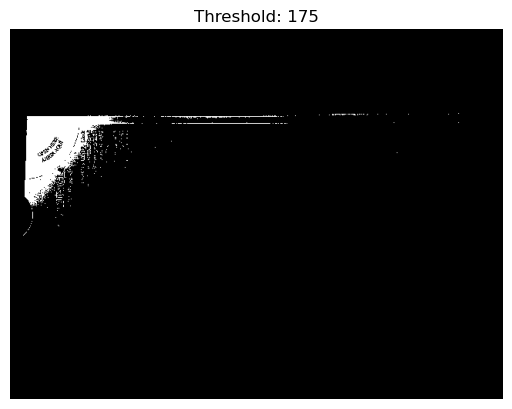

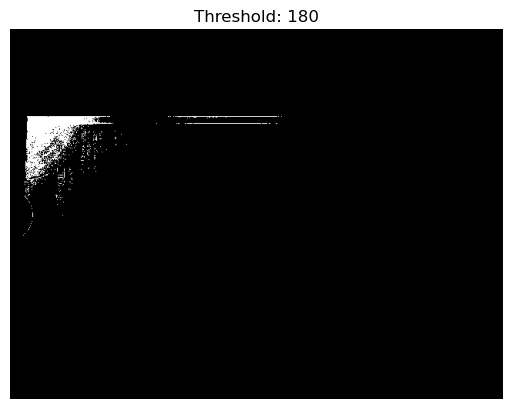

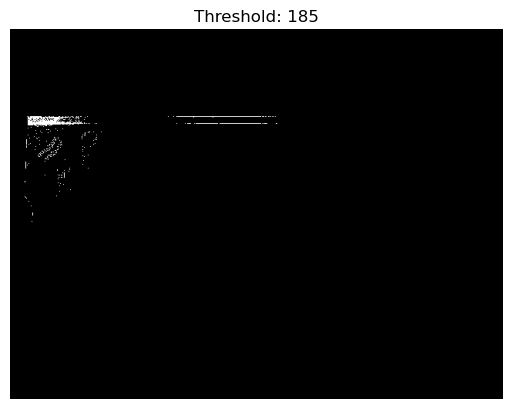

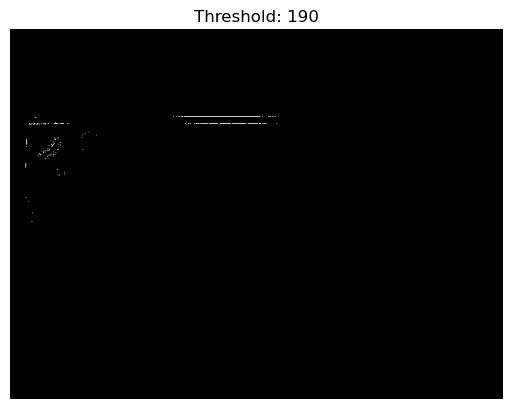

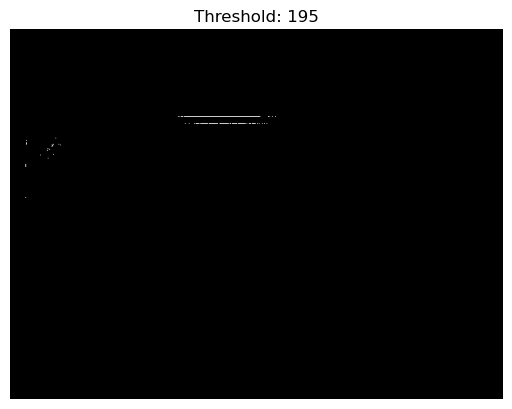

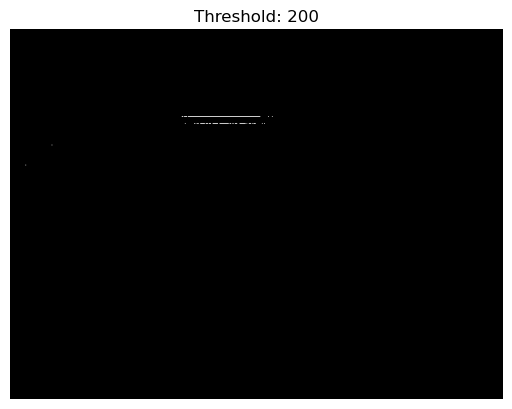

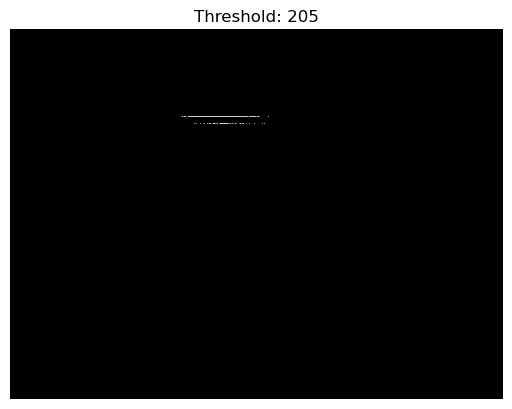

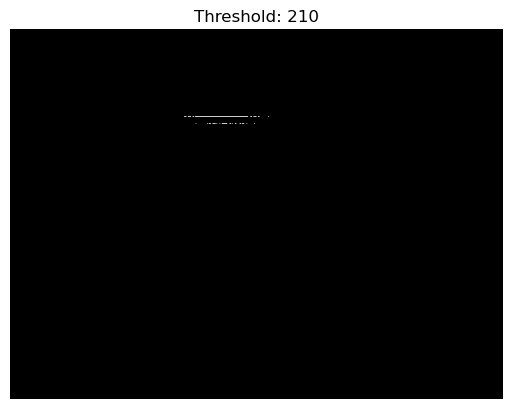

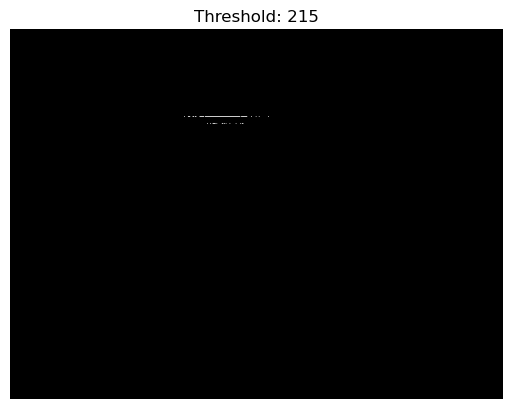

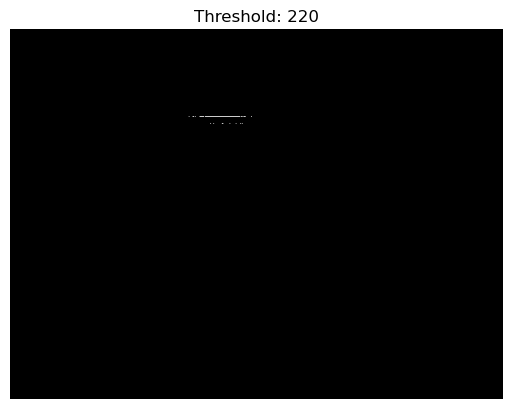

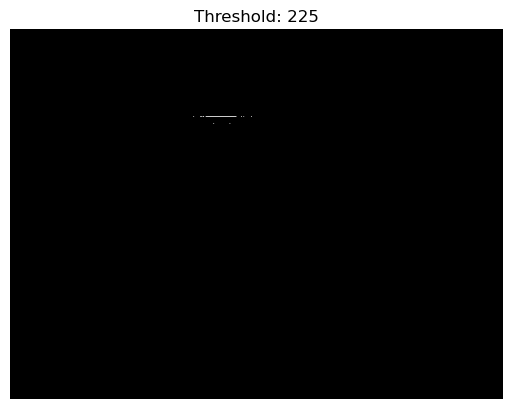

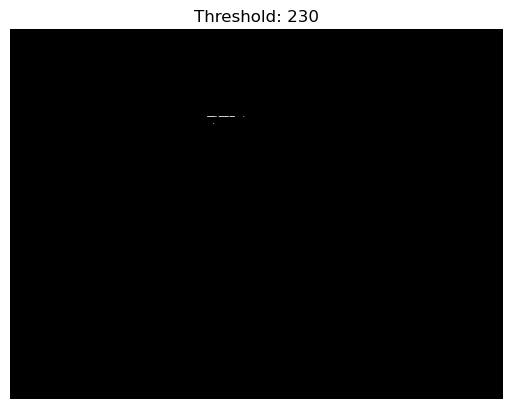

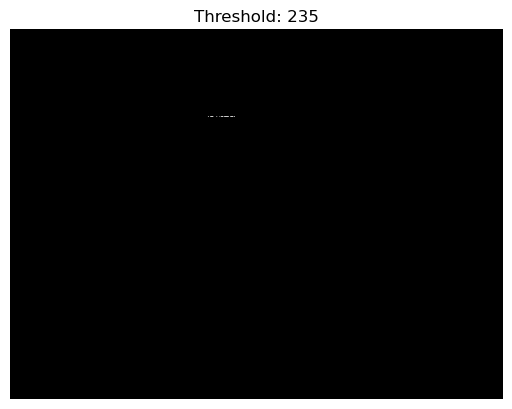

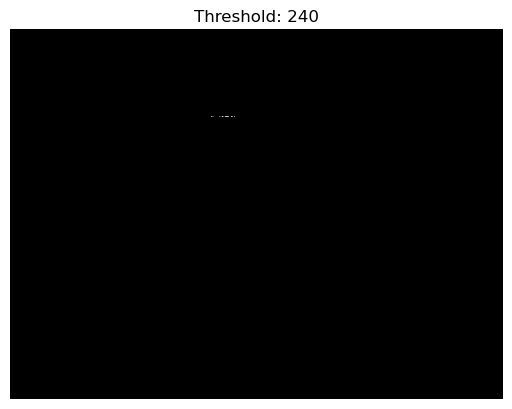

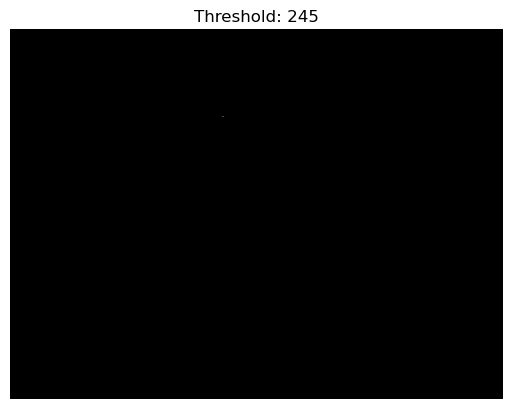

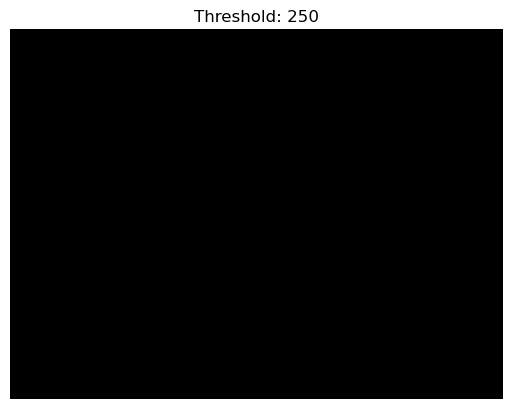

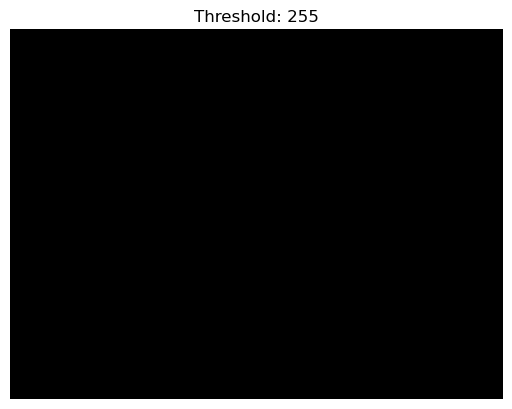

In [61]:
for t in range(0, 256, 5):
    _, temp = cv2.threshold(gray, t, 255,
                            cv2.THRESH_BINARY)
    plt.imshow(temp, cmap="gray")
    plt.title(f"Threshold: {t}")
    plt.axis("off")
    plt.pause(0.05)
    plt.show()

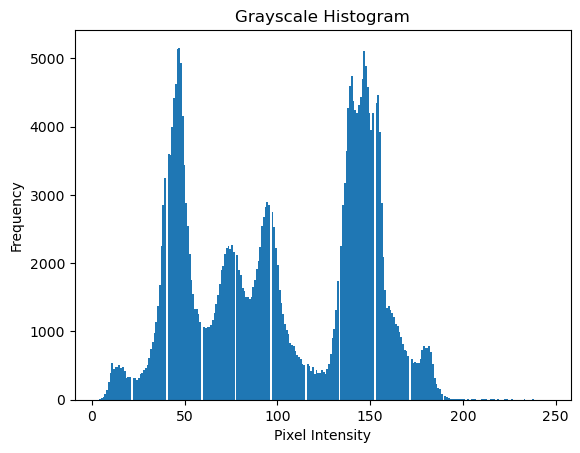

In [62]:
plt.hist(gray.flatten(), bins=256)
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

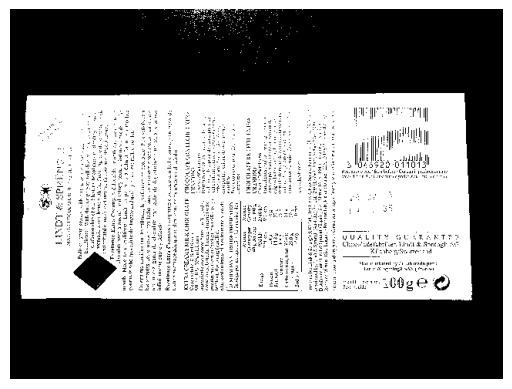

In [63]:
_, blue_binary = cv2.threshold(B, 80, 255, cv2.THRESH_BINARY)
plt.imshow(blue_binary, cmap="gray")
plt.axis("off")
plt.show()

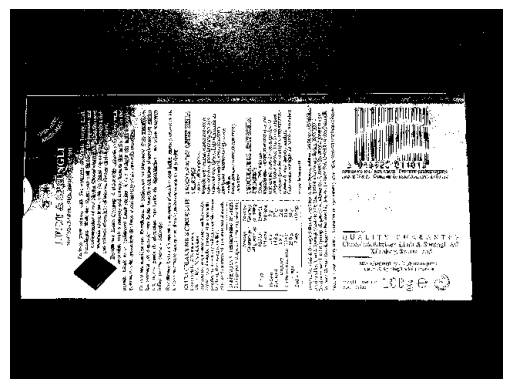

In [72]:
lower_t = 70
upper_t = 150

_, lower_mask = cv2.threshold(B, lower_t, 255, cv2.THRESH_BINARY)
_, upper_mask = cv2.threshold(B, upper_t, 255, cv2.THRESH_BINARY)

middle_region = cv2.subtract(lower_mask, upper_mask)

plt.imshow(middle_region, cmap="gray")
plt.axis("off")
plt.show()


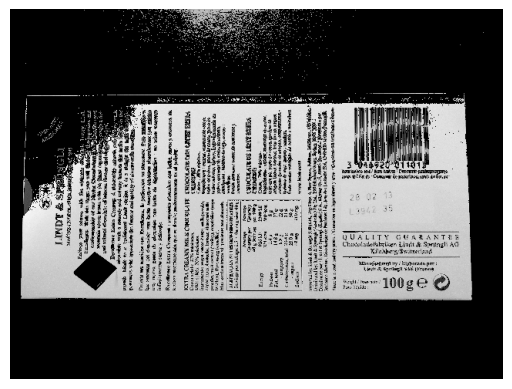

In [73]:
result = cv2.bitwise_and(gray, middle_region)
plt.imshow(result, cmap="gray")
plt.axis("off")
plt.show()

Text(0.5, 0, 'Pixel Intensity')

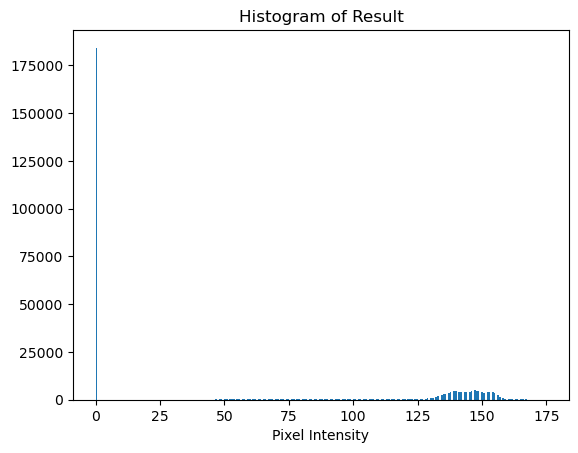

In [74]:
plt.hist(result.flatten(), bins=256)
plt.title("Histogram of Result")
plt.xlabel("Pixel Intensity")

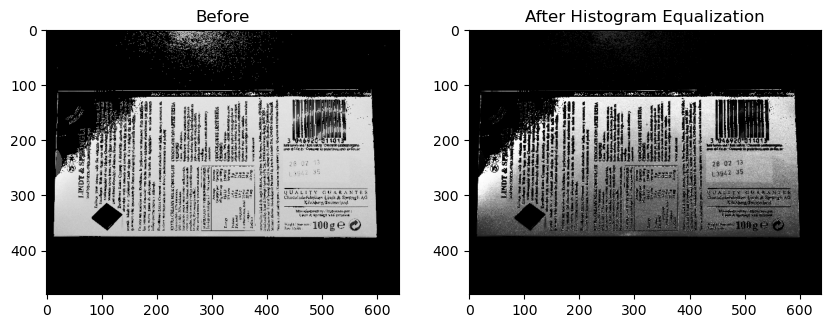

In [75]:
equalised = cv2.equalizeHist(result)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(result, cmap="gray")
plt.title("Before")
plt.subplot(1,2,2)
plt.imshow(equalised, cmap="gray")
plt.title("After Histogram Equalization")
plt.show()